# Project 1 : Adiabatic flame temperature 

In [1]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

### Problem 1

HE is added to the 'gri30_highT.cti' and named as 'gri30_highT_withHE.cti'. The cantera file is updated accordingly. 

In [2]:
gas=ct.Solution('gri30_highT_withHE.cti')
gas.basis='molar'

## Problem 2
Finding adiabatic flame temperature for CO, H2, CH4, C2H6,C2H4, C2H2 and C3H8 in air. So the oxidizer is O2 and 3.76 N2 

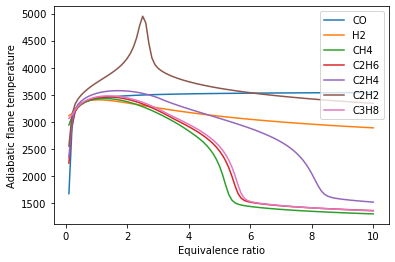

In [15]:
n=100  # no of equivalence ratio
fuel_range=['CO','H2','CH4','C2H6','C2H4','C2H2','C3H8'] # fuel 
ox_range  =['O2']
eq_range  =np.linspace(0.1,10,n)
ad_flame  =np.zeros((len(fuel_range),n))

# define constant properties
T=300
P=101325


gas.TP=T,P
fig= plt.figure()
for fuel in fuel_range:
    f_index= fuel_range.index(fuel)
    f_mix = fuel+':1'
    o_mix = ox_range[0]+':1'
    for phi in eq_range:
        phi_index= np.where(eq_range==phi)
        gas.set_equivalence_ratio(phi,f_mix,o_mix)
        gas.equilibrate('HP')
        ad_flame[f_index][phi_index[0]]= gas.T
        #print('The adiabatic flame temp of',fuel, ': ',str(ad_flame[f_index][phi_index[0]]),'K')
    plt.plot(eq_range,ad_flame[f_index][:],label=fuel)
    
plt.legend(loc='upper right')
plt.xlabel('Equivalence ratio')
plt.ylabel('Adiabatic flame temperature')
plt.show()
        
        
    

numpy.ndarray

list